In [1]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np

In [3]:
# from tf.keras.datasets.mnist import input_data

import sys  
sys.path.insert(0, "D:\Python\Pattern\mnist")

import input_data
# import mnist

In [4]:
import os

In [5]:
#we are using Gradient Descent Full Batch, means all the sample training data will be used for training at each iteration of learning
def download_MNIST_dataset_and_return_train_and_test_data():
    print("Into Function: {}\n------------------------------------------------------------------\n".
          format(download_MNIST_dataset_and_return_train_and_test_data.__name__))
    if not os.path.exists("MNIST_data"):
        print("Downloading MNIST Data Set")
        mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
    else:
        print("MNIST Data Set is already exists.\n")
        response=input("Do you want to download again (Y/N):")
        if response.startswith("Y"):
            print("Redownloading the MNIST Data Set, Old data set might be broken.......")
            mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
        else:
            print("I am confident that the MNIST dataset is at solid state")
    
    #taining data shape=(55000,784) meaning 55000 sample images, eaching having 28*28 pixels and 
    #training label shape=(55000,10) means, its a multiclass problem, each character will be classified either 0 or 1 or 2
    # or 3 or 4 or 5 or 6 or 7 or 8 or 9, means total 10 classes, but not two classes at the same time
    
    #testing sample shape=(10000, 784), means system has to test and classify 10000 samples
    train_X,train_Y,test_X,test_Y=mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels
    #remember all the images are in 28*28 pixe, thats why each pixel is acting as features, having 28*28=784 pixes or features
    print("Returning training data+ labels and testing data + labels")
    return train_X,train_Y,test_X,test_Y
    

In [6]:
# remember, all the input datas are in (?,784) format and output is of 10 classes in the format (?,10)
def set_placeholder_weights_biases(input_dimension,output_dimension):
    print("Into function: {}\n--------------------\n".format(set_placeholder_weights_biases.__name__))
    #Set the placeholder for training inputs and training labels
    X=tf.placeholder(tf.float32,[None,input_dimension],name="x_inputs") # (?, 784)
    Y=tf.placeholder(tf.float32,[None,output_dimension],name="y_outputs") #(?, 10)
    
    #randomely set the weights in the dimension of (784,10) # remember we have to do a matrix multiplication (x.w)+b
    #(?,784) X (784,10)= (?,10)
    w=tf.Variable(tf.random_normal([input_dimension,output_dimension],stddev=0.01),name="Weights")
    b=tf.Variable(tf.random_normal([output_dimension]),name="Biases")
    
    return X,Y,w,b

In [7]:
#X=training data in shape (?,784) #2D tensor
#W= random weight or coefficient in the shape (784,10) #2D tensor
#b= bias value in the shape (10) #1D tensor
def forward_pass(X,w,b):
    print("Doing X*w+b using function: {}".format(forward_pass.__name__))
    return tf.matmul(X,w)+b

In [8]:
#Defining the multi-class cost or loss function
#Remember in the single class problem earlier, we have used the cross entroy of Mean Square Error as the loss function
def multiclass_cost(y_pred,Y):
    print("Calculating the prediction error using function: {}".format(multiclass_cost.__name__))
    error=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=Y))
    return error

In [9]:
def init():
    print("Initializing all variable using: {}".format(init.__name__))
    return tf.global_variables_initializer()

In [10]:
#the training operation will try to reduce the error or loss using a specified learning rate
#Selection of learning rate depends when how many steps you wants your system to converg.
#Converge means, from that point onward there will have no significant reduction in error, thus accuracy will not improve
#You may use the early stoping, to avoid overfitting of your data

#Remember we are using Gradient Descent Full Batch..
def training_operation(learning_rate,error,sample_size):
    print("into :{}: Training with {} Samples".format(training_operation.__name__,sample_size))
    train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(error)
    return train_op

In [11]:
def data_normalization_z(data):
    mu=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    return (data-mu)/std

In [17]:
import tensorflow_datasets as tfds

In [19]:
#Stage-01 Setup
# train_X,train_Y,test_X,test_Y=download_MNIST_dataset_and_return_train_and_test_data()
train_X,train_Y,test_X,test_Y=tfds.load('mnist')
# train_X.shape= (55000,784), train_Y.shape= (55000,10)
X,Y,w,b=set_placeholder_weights_biases(train_X.shape[1],train_Y.shape[1]) 
y_pred=forward_pass(X,w,b)
error=multiclass_cost(y_pred,Y)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

C:\Users\nowes\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\nowes\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\nowes\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\nowes\anaconda3\lib\site-pac

0 examples [00:00, ? examples/s]

Shuffling...:   0%|          | 0/10 [00:00<?, ? shard/s]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/6000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling...:   0%|          | 0/1 [00:00<?, ? shard/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist downloaded and prepared to C:\Users\nowes\tensorflow_datasets\mnist\1.0.0. Subsequent calls will reuse this data.


ValueError: not enough values to unpack (expected 4, got 2)

In [20]:
learning_rate=0.01
epoches=100 # we believe, after the iteration of 1000 step, the training will converge to a 
#good prediction with minimal error

In [21]:
training_op=training_operation(learning_rate,error,train_X.shape[0])

into :training_operation: Training with 55000 Samples


##### Set two tracer , (a) loss_tracer (b) accuracy_tracer

In [22]:
loss_tracer=[]
accuracy_tracer=[]

In [23]:
import pandas as pd

### Start the Session, Simulation begins here

In [24]:
with tf.Session() as sess:
    sess.run(init())
    print("Before Training Session Weight(W) Vector and Bias (B) was as follows:\n")
    print("Weights(W) of Shape {}:\n{}".format(w.shape,data_normalization_z(w.eval())[:10]))
    print("Bias(B) of Shape {}:\n{}".format(b.shape,data_normalization_z(b.eval())[:10]))
    
    for step in range(epoches):
        #-----------------This Section is for Loss or Error Calculation---------------------------
        _,loss_=sess.run([training_op,error],feed_dict={X:train_X,Y:train_Y})
        ##print("Error:{}%".format(loss_*100))
        loss_tracer.append(loss_)


        #------------------This Section is For Accuracy Calculation-------------------------------
        #column_name=["y_hat","y_act"]
        y_hat=np.argmax(sess.run(y_pred,feed_dict={X:train_X,Y:train_Y}),axis=1)

        #sess.run(y_pred,feed_dict={X:train_X,Y:train_Y}) returns y_pred in the shape of (55000,10)
        #np.argmax(sess.run(y_pred,feed_dict={X:train_X,Y:train_Y}),axis=1) -->
        #converts y_pred shape of (55000,10) into (55000,) in the flattern format

        ##print("y_hat_shape:{}".format(y_hat.shape))
        #print("y_hat:\n{}".format(y_hat[:10]))
        #print(y_hat.dtype)


        y_act=np.argmax(train_Y,axis=1)
        ##print("y_act_shape:{}".format(y_act.shape))
        #print("y_act:\n{}".format(y_act[:10]))
        #print(y_act.dtype)


        comparison=(y_hat==y_act)


        #set_range, R
        
        R=20
        #d={"y_hat":[y_hat[i] for i in range(R)],"y_act":[y_act[j] for j in range(R)],
           #"Comparison":[comparison[k] for k in range(R)]}
        #df=pd.DataFrame(data=d)
        #print(df.head(R))

        accuracy_=np.mean(comparison)
        #print("Accuracy:{}%".format(accuracy_*100))

        accuracy_tracer.append(accuracy_)
    
    #------------------------Printing the Training information-----------------------------------------------------
    d1={"error":[loss_tracer[i] for i in range(epoches)],"accuracy":[accuracy_tracer[j] for j in range(epoches)]}
    df1=pd.DataFrame(data=d1)
    print(df1.head(epoches))
    
    
    #After the end of the training the Weight and Bias vectors are already updated, 
    #which will be later used in the testing data
    
    #----------------Now use the Test data for validation----------------------
    loss_test=sess.run(error,feed_dict={X:test_X,Y:test_Y})
    y_hat_test=np.argmax(sess.run(y_pred,feed_dict={X:test_X,Y:test_Y}),axis=1)
    y_act_test=np.argmax(test_Y,axis=1)
    comparison_test=(y_hat_test==y_act_test)
    accuracy_test=np.mean(comparison_test)
    
    
    #-------------Generating Summary Report------------------------------
    print("Generating the Summary Report\n-------------------------------\n")
    
    print("After Training Session Weight(W) Vector and Bias (B) has been updated as follows:\n")
    
    print("Weights(W) of Shape {}:\n{}".format(w.shape,data_normalization_z(w.eval())[:10]))
    print("Bias(B) of Shape {}:\n{}".format(b.shape,data_normalization_z(b.eval())[:10]))
    
    print("Final Training Result:\t Error: {}%\t Accuracy: {}%".format(loss_tracer[-1]*100,accuracy_tracer[-1]*100))
    print("Result of Test Data:\t Error: {}%\t Accuracy: {}%".format(loss_test*100,accuracy_test*100))
    
        

Initializing all variable using: init
Before Training Session Weight(W) Vector and Bias (B) was as follows:

Weights(W) of Shape (784, 10):
[[-0.7697948   0.5024563  -0.4003449  -1.2203169   0.24786478  1.0961665
   1.536401   -0.74641746  0.5966652  -0.25403756]
 [-0.92912793 -0.02119926  0.2859438   1.9084064   1.7009747  -1.4422938
  -0.46659297 -0.8146334  -1.5958278  -0.3760937 ]
 [ 0.785407    1.0251582  -1.8406192  -2.0898666   1.6831301   0.01049775
   2.0170305   0.49112248  0.45438242 -0.29025108]
 [-0.8093431   0.0886313  -1.2801602  -0.16453478 -2.0888746   0.17004296
   0.18215144 -1.5263346  -1.1874919   0.11449195]
 [-2.1555488  -3.2709298  -0.04314548  0.8319107  -0.81555754 -0.04834097
  -1.4824046   1.3104256  -1.5239644   0.28838104]
 [ 1.1786666   0.03079147 -0.89580154 -1.32013     3.0163538   1.1720791
  -0.94114053  0.6966696  -1.4271837  -0.91039693]
 [ 0.65833014 -0.81270593 -0.2959548   0.72155905  0.14074253  0.13128911
  -0.0178101  -1.1970078   0.76201826 -

## Drawing the graphs

In [25]:
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

In [27]:
print("Actual Digits:{}".format(np.argmax(test_Y[:10],axis=1)))

Actual Digits:[7 2 1 0 4 1 4 9 5 9]


In [28]:
print("Predicted Digits: {}".format(y_hat_test[:10]))

Predicted Digits: [7 2 1 0 2 1 4 9 6 7]


In [29]:
from pylab import *

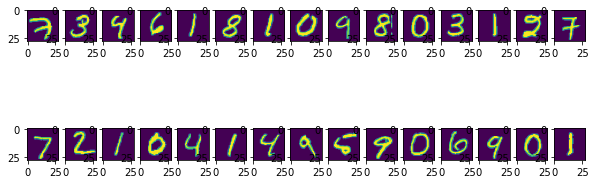

In [30]:
#remember, only the training data and testing data has the shape of (?,784)
#having all the features of shape 28X28 pixels. 
fig,(ax1,ax2)=plt.subplots(2,15,figsize=(10,4))

for i in range(15):
    ax1[i].imshow(np.reshape(train_X[i],(28,28)))
for j in range(15):
    ax2[j].imshow(np.reshape(test_X[j],(28,28)))

In [31]:
test_X[0].shape


(784,)

In [32]:
test_Y.shape

(10000, 10)